## Function Pipeline

In [2]:
import torch
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="pkg_resources")

print(torch.version.cuda)  # type: ignore
print(torch.cuda.is_available())
print(torch.cuda.device_count())
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))
else:
    print("CUDA not available")

12.6
True
1
NVIDIA GeForce RTX 4060 Laptop GPU


### Sentiment-Analysis

In [2]:
from transformers.pipelines import pipeline

classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")  # type: ignore
result = classifier("I've been waiting for a HuggingFace course of my whole life")
print(result)

/home/developer/Dev/Hands-on-Machine-Learning-Projects/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-07-09 15:31:19.170931: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-09 15:31:19.246855: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752060679.275964    5763 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752060679.2839

[{'label': 'POSITIVE', 'score': 0.8563370108604431}]


In [2]:
from transformers.pipelines import pipeline

classifier = pipeline(
    "sentiment-analysis", # type: ignore
    model="distilbert/distilbert-base-uncased-finetuned-sst-2-english",
    device=0,  # Use GPU 0
)
result = classifier(["I've been waiting for a HuggingFace course of my whole life", "I hate this so much!"])
print(result)

/home/developer/Dev/Hands-on-Machine-Learning-Projects/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-07-09 17:55:13.427535: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-09 17:55:13.434630: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752069313.442792  165089 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752069313.4452

[{'label': 'POSITIVE', 'score': 0.8563370108604431}, {'label': 'NEGATIVE', 'score': 0.9994558691978455}]


In [ ]:
from transformers.pipelines import pipeline

classifier = pipeline("zero-shot-classification")
classifier(sequences = "This is a course about the Transformers library",
           candidate_labels = ["education", "politics", "business"])

### Text Generator

In [4]:
from transformers.pipelines import pipeline
generator = pipeline("text-generation")
Generated_text  = generator("In this course, we will teach you how to")

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [5]:
print(Generated_text[0]['generated_text'])

In this course, we will teach you how to use the Google Home, a simple Home Assistant that you can use to share photos and videos with other people. The Google Home will also make it easy to share images with friends and family.

In this course, you will learn how to use the Google Home, a simple Home Assistant that you can use to share photos and videos with other people. The Google Home will also make it easy to share images with friends and family. In this course, we will learn how to use the Google Home, a simple Home Assistant that you can use to share photos and videos with other people. In this course, we will learn how to use the Google Home, a simple Home Assistant that you can use to share photos and videos with other people. In this course, we will learn how to use the Google Home, a simple Home Assistant that you can use to share photos and videos with other people. In this course, we will learn how to use the Google Home, a simple Home Assistant that you can use to share p

In [6]:
from transformers.pipelines import pipeline

generator = pipeline(task="text-generation", model = "distilgpt2")
Generated_text = generator(
    text_inputs="Yesterday I saw",
    max_length=30,
    num_return_sequences=2)
print(Generated_text[0]["generated_text"])

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Yesterday I saw the video of the man holding a gun and the white man holding a gun and the black man holding a gun.


I was so disgusted by what happened, I was scared to go to the grocery store and get the gun. I went to the grocery store and got a gun and the white man held the gun.
I was so disgusted by what happened, I was scared to go to the grocery store and get the gun.
I went to the grocery store and got a gun and the white man held the gun.
I called 911 to tell the dispatcher that he had stolen a gun from the store. He told me that the white man had stolen the gun and that he had stolen a gun from the store.
I told the dispatcher that he had stolen a gun from the store. He told me that the white man had stolen a gun from the store. He told me that the white man had stolen a gun from the store. He told me that the white man had stolen a gun from the store. He told me that the white man had stolen a gun from the store.
He told me that the white man had stolen a gun from the stor

### Fill the mask

In [7]:
from transformers.pipelines import pipeline
unmasker = pipeline(task="fill-mask", model="distilroberta")
output = unmasker("I was watching a movie for 007 who was called <mask> and it was so amazing",top_k=14)
# top_k is an argument for the top accuracy of the outputs
print(output)

OSError: distilroberta is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

In [8]:
ner = pipeline("ner", grouped_entities=True)  # type: ignore
text = ner(
    "My name is Mohammed Khalaf and I'm working at Noor Al-Mamzer Group in Dubai as an AI Developer"
)
for entity in text:
    print(entity)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


{'entity_group': 'PER', 'score': np.float32(0.9964017), 'word': 'Mohammed Khalaf', 'start': 11, 'end': 26}
{'entity_group': 'ORG', 'score': np.float32(0.9506372), 'word': 'Noor Al - Mamzer Group', 'start': 46, 'end': 66}
{'entity_group': 'LOC', 'score': np.float32(0.99957806), 'word': 'Dubai', 'start': 70, 'end': 75}


/home/developer/Dev/Hands-on-Machine-Learning-Projects/venv/lib/python3.11/site-packages/transformers/pipelines/token_classification.py:181: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


In [ ]:
ner = pipeline("ner", grouped_entities=True)  # type: ignore

In [ ]:
# Example: Using HuggingFace Transformers Pipelines

# 1. Sentiment Analysis
sentiment = classifier("Transformers are amazing!")
print("Sentiment Analysis:", sentiment)

In [ ]:
# 2. Zero-Shot Classification
zero_shot = pipeline("zero-shot-classification")
zero_shot_result = zero_shot(
    sequences="Transformers can do many NLP tasks.",
    candidate_labels=["text classification", "image recognition", "speech synthesis"],
)
print("Zero-Shot Classification:", zero_shot_result)

# 3. Text Generation
generated = generator("Once upon a time,", max_length=30)
print("Text Generation:", generated[0]["generated_text"])

# 4. Fill-Mask
masked_sentence = "The capital of France is <mask>."
mask_result = unmasker(masked_sentence, top_k=1)
print("Fill-Mask:", mask_result)

# 5. Named Entity Recognition (NER)
ner_result = ner("Barack Obama was born in Hawaii.")
print("NER:", ner_result)

In [ ]:
qa_pipeline = pipeline("question-answering")
context = "HuggingFace Transformers is a popular library for natural language processing tasks."
question = "What is HuggingFace Transformers?"
answer = qa_pipeline(question=question, context=context)
print(answer)

# The Stages in the Pipeline:
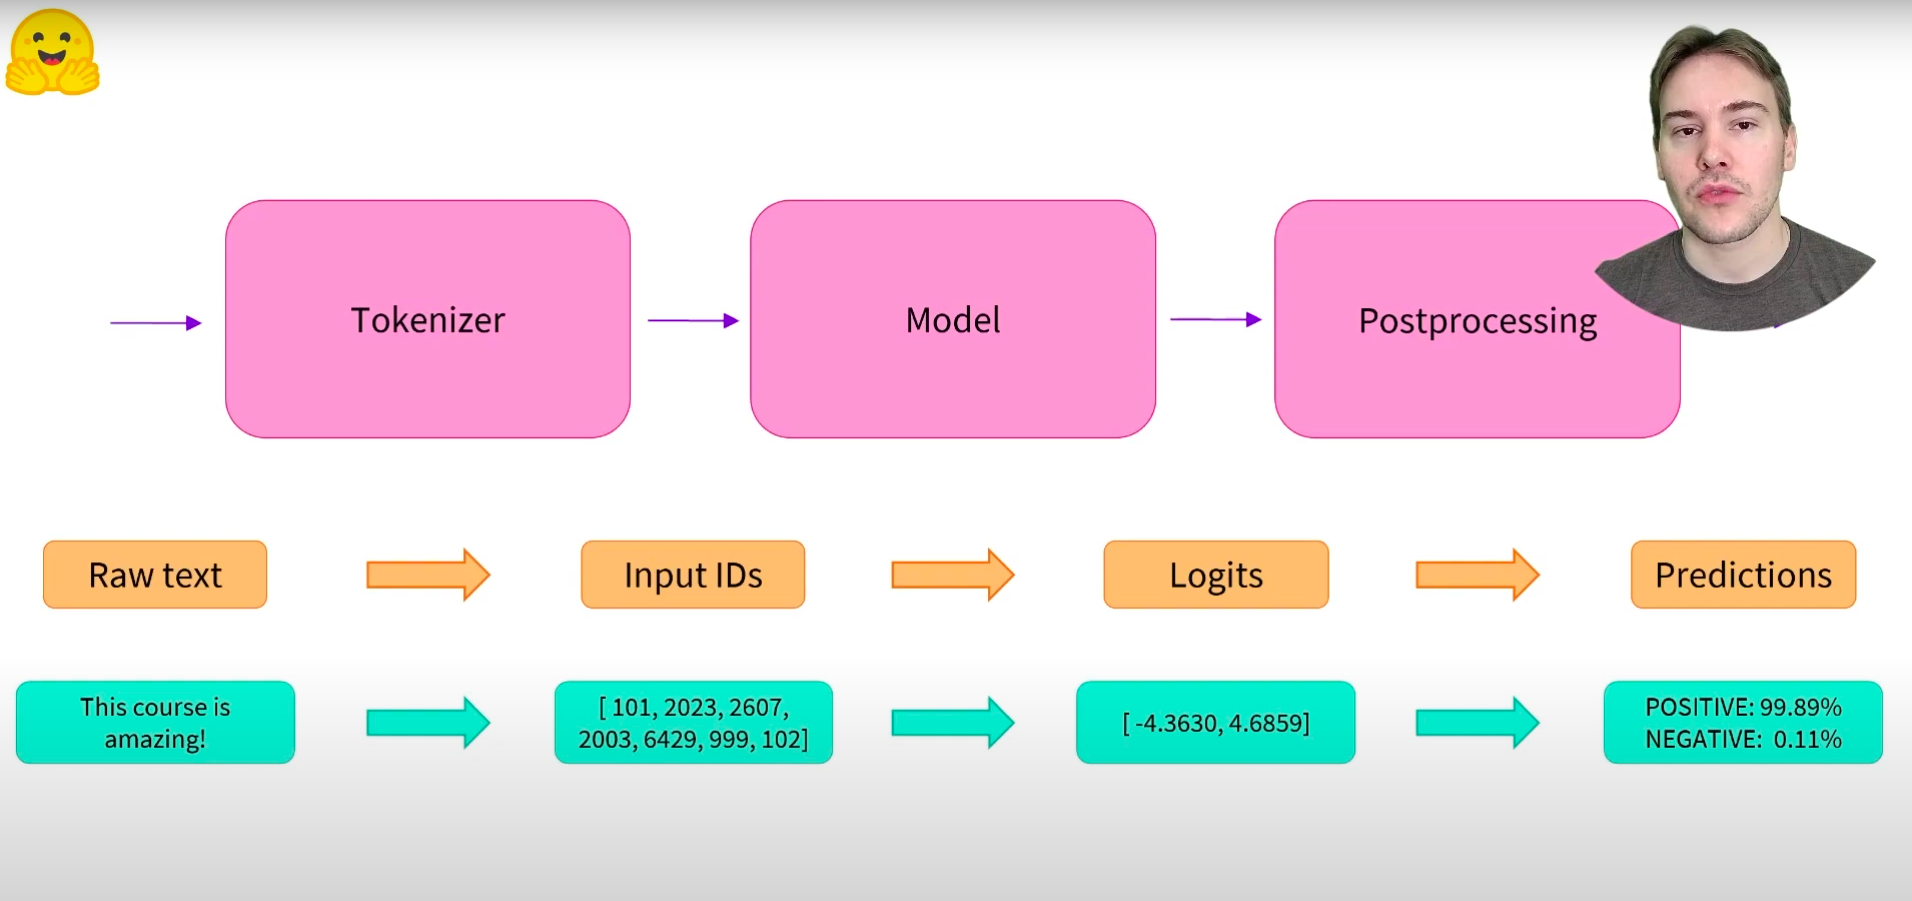

# What happens inside the pipeline function? (PyTorch)

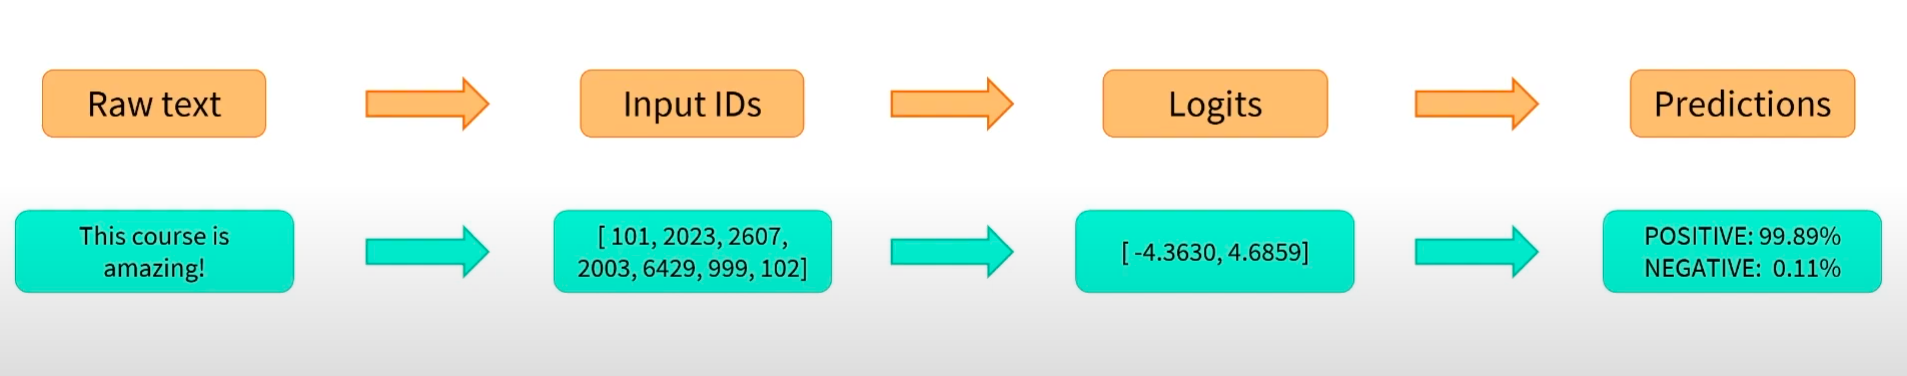

In [9]:
from transformers.pipelines import pipeline

# classifier = pipeline("sentiment-analysis")

classifier = pipeline(
    "sentiment-analysis",  # type: ignore
    model="distilbert/distilbert-base-uncased-finetuned-sst-2-english",
    device=-1,  # Use GPU 0
)

classifier([
    "I've been waiting for a HuggingFace course my whole life.", 
    "I hate this so much!",
    "I never hate this so much!",  # Added a new input
])

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9598049521446228},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455},
 {'label': 'POSITIVE', 'score': 0.999481737613678}]

In [10]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
    "I never hate this so much!",  # Added a new input
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0],
        [  101,  1045,  2196,  5223,  2023,  2061,  2172,   999,   102,     0,
             0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]])}


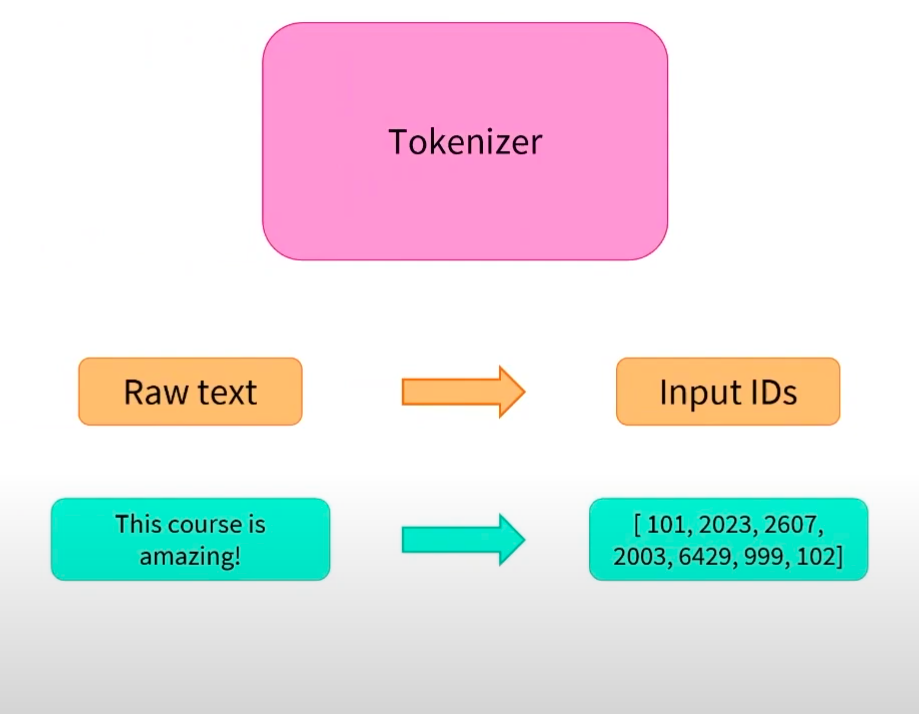

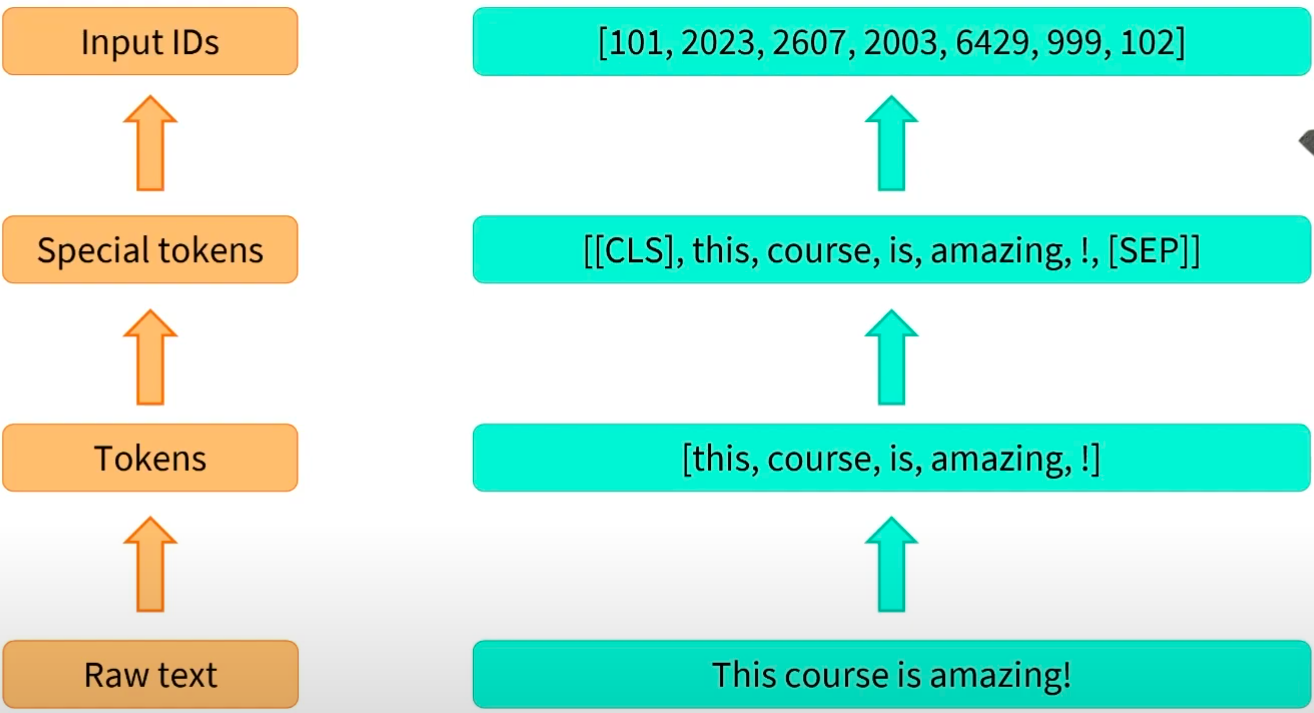

In [ ]:
from transformers import AutoModel

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModel.from_pretrained(checkpoint)
outputs = model(**inputs)
print(outputs.last_hidden_state.shape)

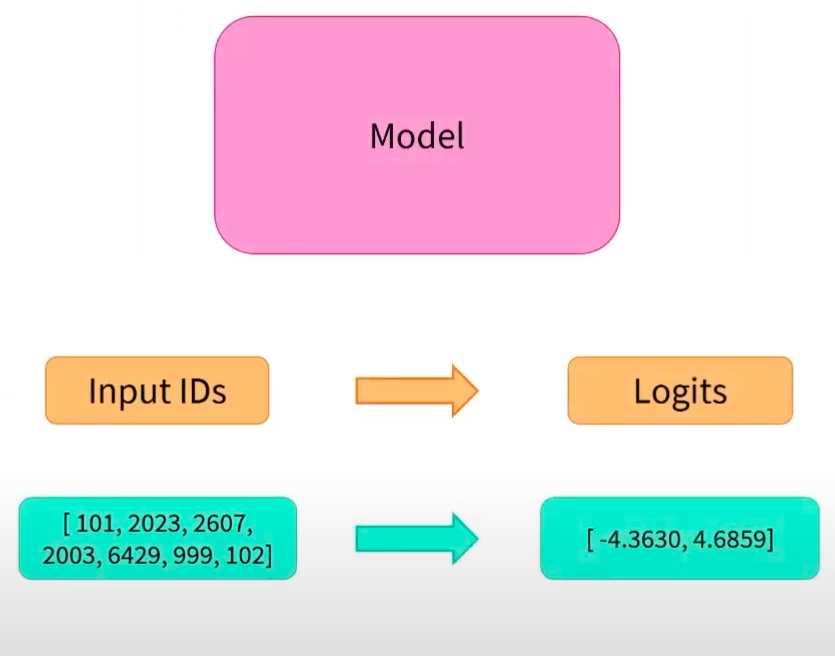

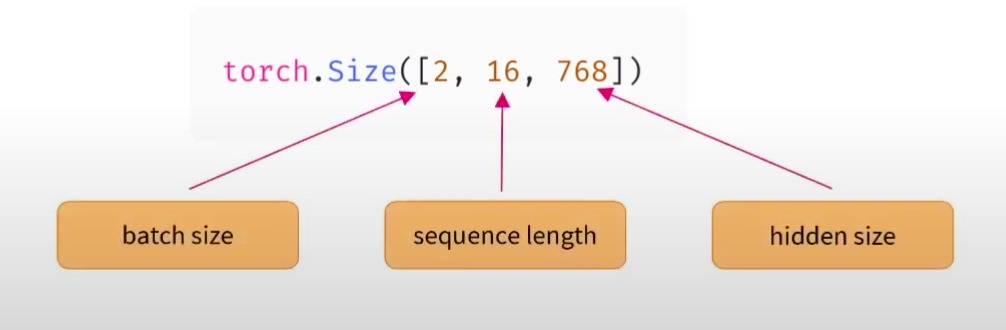

In [12]:
from transformers import AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs = model(**inputs)
print(outputs.logits)

tensor([[-1.5607,  1.6123],
        [ 4.1692, -3.3464],
        [-3.6677,  3.8967]], grad_fn=<AddmmBackward0>)


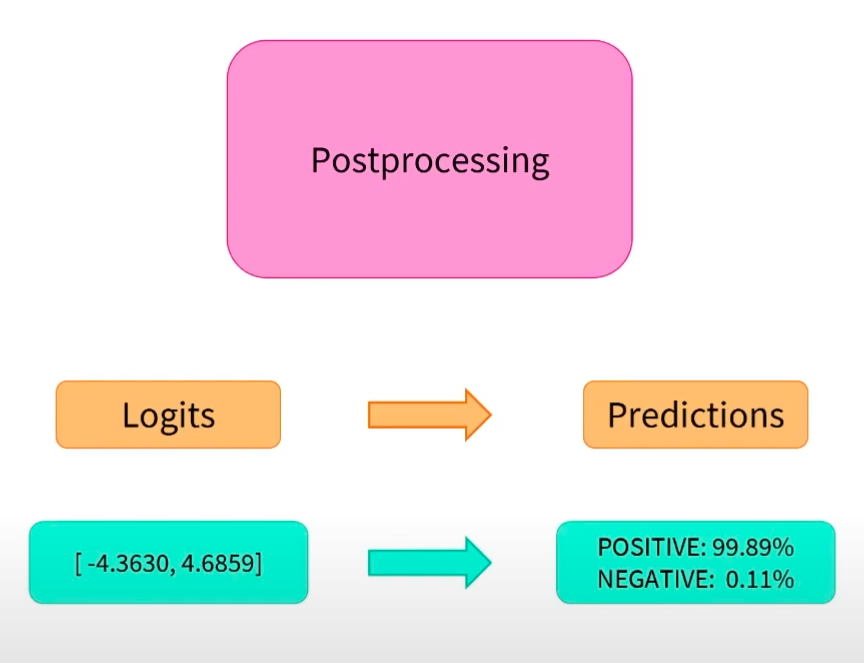

In [13]:
import torch

predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)

tensor([[4.0195e-02, 9.5980e-01],
        [9.9946e-01, 5.4418e-04],
        [5.1830e-04, 9.9948e-01]], grad_fn=<SoftmaxBackward0>)


In [14]:
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}

# What happens inside the pipeline function? (TensorFlow)

In [6]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
    "I never hate this so much!",  # Added a new input
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="tf")
print(inputs)

{'input_ids': <tf.Tensor: shape=(3, 16), dtype=int32, numpy=
array([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662,
        12172,  2607,  2026,  2878,  2166,  1012,   102],
       [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,
            0,     0,     0,     0,     0,     0,     0],
       [  101,  1045,  2196,  5223,  2023,  2061,  2172,   999,   102,
            0,     0,     0,     0,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(3, 16), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>}


In [7]:
import tensorflow as tf
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer, pipeline  # type: ignore

# from transformers.pipelines import pipeline
print("Devices available:", tf.config.list_logical_devices())

model_name = "distilbert-base-uncased-finetuned-sst-2-english"

# Load tokenizer and model explicitly
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = TFAutoModelForSequenceClassification.from_pretrained(model_name)

# Create pipeline manually to avoid implicit 'torch_dtype'
classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, framework="tf")  # type: ignore

# Run classification
results = classifier(
    [
        "TensorFlow is great for production!",
        "I find building data pipelines with tf.data very efficient.",
    ]
)

for result in results:
    print(result)

Devices available: [LogicalDevice(name='/device:CPU:0', device_type='CPU'), LogicalDevice(name='/device:GPU:0', device_type='GPU')]


All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.
Device set to use 0


{'label': 'POSITIVE', 'score': 0.9998189806938171}
{'label': 'POSITIVE', 'score': 0.9989141225814819}


In [ ]:
import tensorflow as tf

print(tf.config.list_physical_devices("GPU"))

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [8]:
from transformers import TFAutoModel

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = TFAutoModel.from_pretrained(checkpoint)
outputs = model(inputs)
print(outputs.last_hidden_state.shape)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


(3, 16, 768)


In [9]:
from transformers import TFAutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs = model(inputs)
print(outputs.logits)

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


tf.Tensor(
[[-1.5620654  1.6134218]
 [ 4.1692524 -3.3465357]
 [-3.6676955  3.8964221]], shape=(3, 2), dtype=float32)


In [10]:
import tensorflow as tf

predictions = tf.math.softmax(outputs.logits, axis=-1)
print(predictions)

tf.Tensor(
[[4.0098678e-02 9.5990127e-01]
 [9.9945587e-01 5.4412457e-04]
 [5.1846611e-04 9.9948162e-01]], shape=(3, 2), dtype=float32)


In [11]:
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}